In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

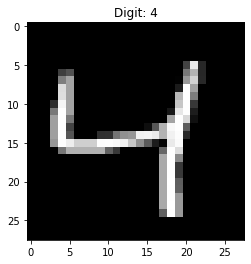

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'), interpolation='none')
plt.title("Digit: {}".format(train_labels[2]))
plt.show()

First let's train with a simple fully-connected network.

In [6]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
test_images = test_images.astype('float32')
train_images = train_images.astype('float32')
test_images /= 255
train_images /= 255

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, verbose=1, validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3850 - accuracy: 0.8917 - val_loss: 0.1954 - val_accuracy: 0.9422
Epoch 2/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1702 - accuracy: 0.9506 - val_loss: 0.1493 - val_accuracy: 0.9566
Epoch 3/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1257 - accuracy: 0.9632 - val_loss: 0.1150 - val_accuracy: 0.9654
Epoch 4/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1010 - accuracy: 0.9699 - val_loss: 0.1050 - val_accuracy: 0.9679
Epoch 5/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0948 - val_accuracy: 0.9719
Epoch 6/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0723 - accuracy: 0.9779 - val_loss: 0.1086 - val_accuracy: 0.9675
Epoch 7/40
60000/60000 [==============================] 

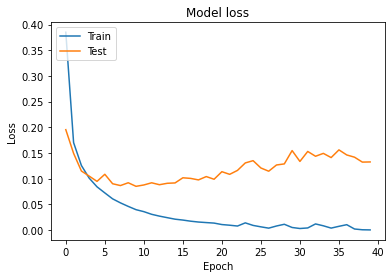

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

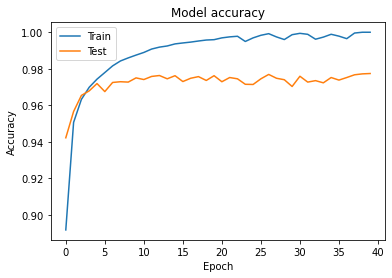

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

Now let's try using a one-layer CNN.

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255, test_images/255

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=1, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2332 - accuracy: 0.9292 - val_loss: 0.0942 - val_accuracy: 0.9724
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0814 - accuracy: 0.9747 - val_loss: 0.0664 - val_accuracy: 0.9798
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0530 - accuracy: 0.9840 - val_loss: 0.0654 - val_accuracy: 0.9790
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0584 - val_accuracy: 0.9817
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 7/10
60000/60000 [==============================] 

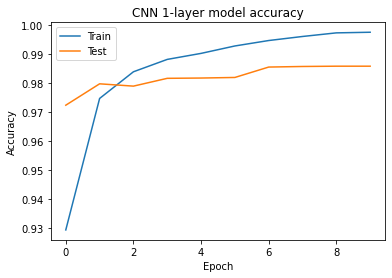

In [15]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN 1-layer model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

Now let's try a 2-layer CNN with dropout.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=1, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2804 - accuracy: 0.9134 - val_loss: 0.0595 - val_accuracy: 0.9801
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1007 - accuracy: 0.9695 - val_loss: 0.0388 - val_accuracy: 0.9872
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0337 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0365 - val_accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 [==============================

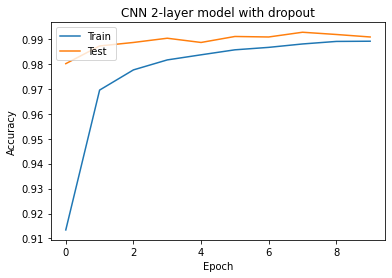

In [12]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('CNN 2-layer model with dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc="upper left")
plt.show()